# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

This is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

_Original source and tons of credits to : https://github.com/mrdbourke/zero-to-mastery-ml, which is part of the Udemy lecture course - Complete Machine learning Bootcamp by Daniel Bourke._

### What is classification?
Classification involves deciding whether a sample is part of one class or another (single-class classification).<br>If there are multiple class options, it's referred to as multi-class classification.

## 1. Problem Definition

In this notebook, the problem explored here is about binary classification (a sample can only be one of two things).

Using a number of different features (pieces of information) about a person, we will try to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

In general, dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

As per this problem, the original data came from the [Cleveland database from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

Howevever, a formatted source of it is provided by [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/) and can be downloaded.<br>
(The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called features) are the variables based on which the target variable is predicted.)

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> Use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


## 3. Evaluation

The evaluation metric is something that should be defined at the start of a project.

Since machine learning is very experimental, you might say something like,<br>
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is, it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.


## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

#### Heart Disease Data Dictionary

A **data dictionary** describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features that can be used to predict target variable (heart disease or no heart disease) :

**<u>Data Dictionary</u>**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * Typical angina: chest pain related decrease blood supply to the heart
    * Atypical angina: chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart related)
    * Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
         * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



> **Tip :** It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.



<br><br>

## Prepearing the tools

At the start of any project, it's a custom to see the required libraries imported in a big chunk (like the cell below).

However, in practice, libraries get imported on the go of a project. After one has spent a couple of hours working on a problem, one would probably want to do some tidying up. This is where one may want to consolidate every library that's used, at the top of notebook (like the cell below).

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We want our plots to appear inside the notebook (magic function)
%matplotlib inline 


## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

<br><br>

## Load Data
There are many different kinds of ways to store data. The typical way of storing tabular data, is in `.csv` format (`.csv` stands for Comma Seperated Values).

Pandas has a built-in function to read .csv files called `read_csv()` which takes the file pathname of a .csv file.

In [2]:
df = pd.read_csv("./data/heart-disease.csv")

df.shape # (rows, columns)

(303, 14)

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<br><br>
_________________________________

## Data Exploration (Exploratory Data Analysis or EDA)

### I.
Once a dataset is imported, the next step is to explore.<br>There's no set way of doing this. But what should be tried to be done is to become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Start building models and sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

> Since EDA has no real set methodolgy, the following is a short check list to keep in mind :
> * What question(s) are you trying to solve (or prove wrong)?
> * What kind of data do you have and how do you treat different types?
> * What’s missing from the data and how do you deal with it?
> * Where are the outliers and why should you care about them?
> * How can you add, change or remove features to get more out of your data?
> * One of the quickest and easiest ways to check data is with the `head()` function.<br>Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5.<br>Pass a number to it, like `head(10)`, to show the top 10 rows.
> * `value_counts()` shows how many times each of the values of a **categorical column** appear.

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<br><br>

Since these 2 values are close to each other, i.e.<br>
People with Heart-Disease (target=1) = 165 and,<br>
People with no Heart Disease (target=0) = 138;<br>
So, the `target` column can be considered balanced.

An unbalanced target column, meaning _some classes have far more samples_, can be harder to model than a balanced set.

<br><br>

Above values can be perceived in percentages; `value_counts()` takes a parameter, `normalize` which can be set to true.

In [16]:
# Normalized value counts

df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [53]:
(165/303, 138/303)

(0.5445544554455446, 0.45544554455445546)

<br><br>

Plot the target column value counts by calling the `plot()` function.

Text(0.5, 0, '0 = No Disease, 1 = Disease')

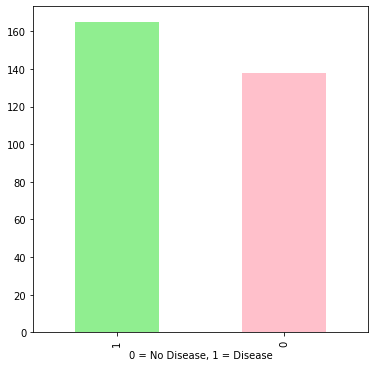

In [62]:
df["target"].value_counts().plot(kind="bar",
                                 figsize=(6, 6),
                                 color=['lightgreen', 'pink'])

plt.xlabel("0 = No Disease, 1 = Disease")

<br><br>

`df.info()` shows a quick insight to the number of missing values and about type of data.

In case of heart disease problem, there are no missing values and all of the columns in `df` are numerical in nature.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<br><br>
Another way to get some quick insights on the dataframe is to use `df.describe()`.<br>

> `describe()` shows a range of different metrics about numerical columns such as `mean`, `max` and `standard deviation`.

In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<br><br>

To check for any missing values in `df` dataframe.<br>
(Seemingly, there are no missing values)

In [65]:
# if any missing values in `df` dataframe

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<br><br>

## II. Heart Disease Frequency according to Gender

To compare 2 columns to each other, use the function `pd.crosstab(column_1, column_2)`.

_This is helpful if you want to start gaining an intuition about how independent variables interact with the dependent variables._

Let's compare **target column** with the **sex column**.

Remember from above data dictionary, for the **target column**, `1 = heart disease present`, `0 = no heart disease`. And for **sex column**, `1 = male`, `0 = female`.

In [41]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

<br>
There are 207 males and 96 females in our study.
<br><br>

In [42]:
# Compare target column with column_1 to column_2

pd.crosstab(df['target'], df['sex'])     # (coulmn_1, column_2)

sex,0,1
target,,
0,24,114
1,72,93


<br><br>

#### What can we infer from this?

Let's make a simple heuristic...

Since there are about 100 women and 72 of them have a postive value of heart disease being present. Based on this one variable, we might infer,<br>
_**if the participant is a woman there's a 75% chance she has heart disease.**_

As for males, there's about 200 total with around half indicating a presence of heart disease. So it can be predicted,<br>
***if the participant is male, 50% of the time he will have heart disease.***

Averaging these 2 values, we can assume (based on no other parameters) if there's a person, there's a **62.5%** chance he/she has heart disease.

This can be considered a very simple baseline, further would try to beat it with machine learning.

<br><br>

Plot the crosstab by using the `plot()` function and passing it a few parameters such as, `kind` (the type of plot), `figsize=(length, width)` (how big for plot to be) and `color=[colour_1, colour_2]` (the different colours you'd like to use).

Different metrics are represented best with different kinds of plots.

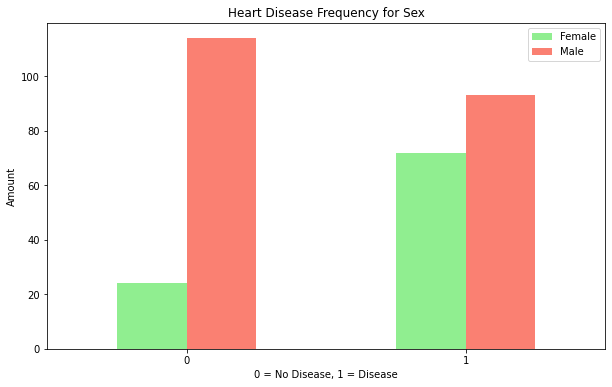

In [66]:
# Create a plot

pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["lightgreen", "salmon"]);

# Add some attributes to plot...

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

<br><br>

## III. Combining Independent Variables

**<u>Demo 1 :</u>**

In EDA, combining of different independent variables can also be done; such as, _age_ and _thalach (maximum heart rate)_ and then comparing them to the _target_ variable.

> **Tip :** Because there are so many different values for _age_ and _thalach_; use a **scatter plot**.
> because, `len(df["thalach"].value_counts()) = 91`, that means there're 91 different values.

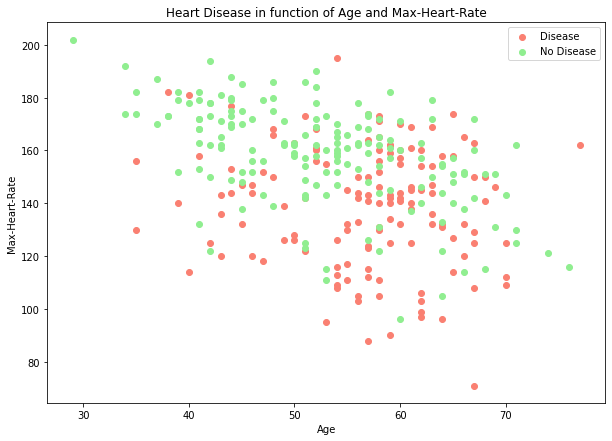

In [93]:
plt.figure(figsize=(10, 7))

# Start with positve examples
plt.scatter(df["age"][df.target==0],
            df["thalach"][df.target==0],
            c="salmon")


# With negative examples. (Call plt again, to view this plot on the same above plot)
plt.scatter(df["age"][df.target==1],
            df["thalach"][df.target==1],
            c="lightgreen")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max-Heart-Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max-Heart-Rate");

<br>

**Inference from above plot ?**

It seems the younger someone is, the higher their max-heart-rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

<br><br>

> **Tip :** Histograms are a great way to check the distribution of a variable

<br>
The distribution (i.e. spread of data) of "age" column is :

<AxesSubplot:ylabel='Frequency'>

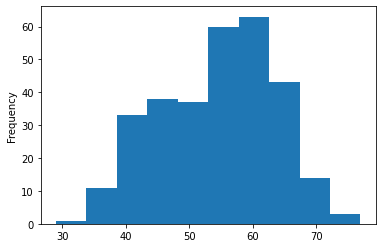

In [83]:
df.age.plot.hist()


<br>
We can see it's a Normal Distribution but slightly swaying to the right, which also reflects in the above scatter plot.

<br><br>

**<u>Demo 2:</u>**

Let's try another independent variable - `cp (chest pain)`

In [84]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


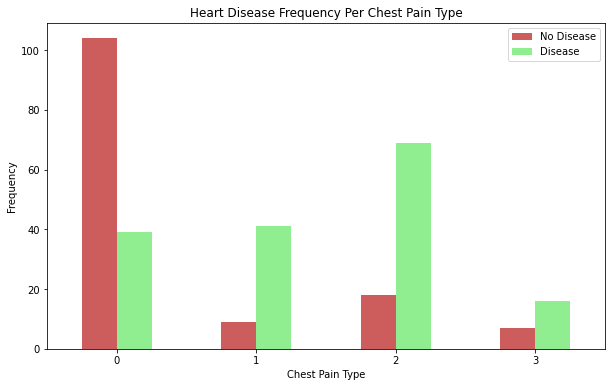

In [92]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["indianred", "lightgreen"])


# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

<br>

**Inference from above plot ?**

The different levels of chest pain are :

(cp - chest pain type)
* 0: Typical Angina: chest pain related to decrease blood supply to the heart
* 1: Atypical Angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
   
The Atypical Angina (value `1`) states -> it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

<br><br>


## IV. Correlation between independent variables

Compare all of the independent variables - is called as finding Correlation.

_Why is this done ?_<br>
Because this may give an idea of which independent variables may or may not have an impact on the target variable.

This is done using `df.corr()` which will generate a correlation matrix. In layman words, it's a dataframe of numbers that tells how related each variable is with the other, i.e. a positive correlation or negative correlation.

In [94]:
# make a Correlation Matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

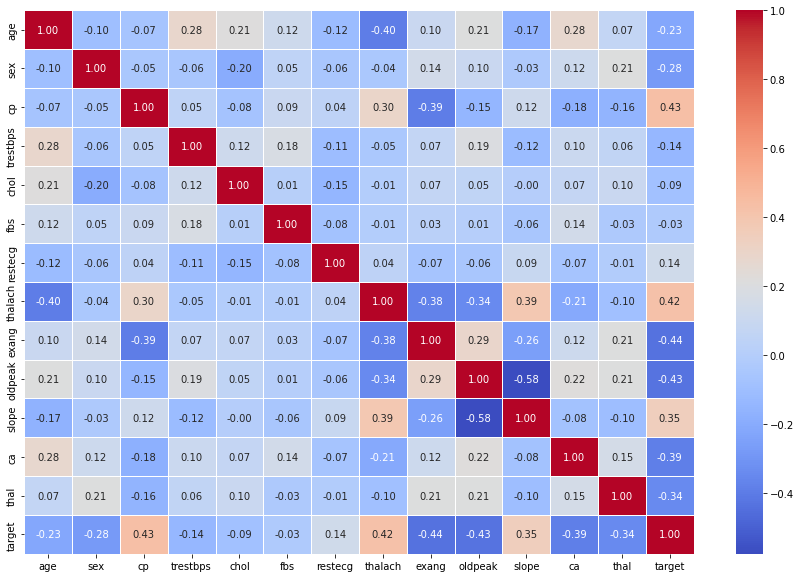

In [143]:
# Let's make it look a little prettier

corr_matrix = df.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="coolwarm")

> ✅ Generally, a higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).<br><br>
> In more words,<br>
> * **Positive Correlation =** a relationship between 2 variables in which one variable ___increases___ as the other ___increases___. (&nbsp; ⬆️ &nbsp; ⬆️ )<br><br>
> * **Negative Correlation =** a relationship between 2 variables in which one variable ___decreases___ as the other ___increases___. (&nbsp; ⬇️ &nbsp; ⬆️ )

___________________________________

### 🛑 Few POINTS TO REMEMBER 🛑

1. Not every EDA will look the same. Seen here above is an example of what could be done for structured, tabular dataset.
2. There are many more ways to visualize data, like :
    * We want to quickly find:
    * Distributions (`df.column.hist()`)
    * Missing values (`df.info()`)
    * Outliers
    
___________________________________

## 5. Modeling

Let's try to use machine learning to predict for "target" variable, based on the 13 independent variables.

_**Problem Statement :** Given clinical parameters about a patient, predict whether or not they have heart disease?_

_**Evaluation metric :** If 95% accuracy is reached at predicting whether or not a patient has heart disease during the proof of concept, this project can be further pursued._ This could be said as aim of project.

<br><br>

1. Seperating independent & dependent variables

In [106]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df["target"].values

2. Training and test split

Split data into a _training set_ and a _test set_.

You training set to train model and the test set to test it.

> The test set must remain separate from training set.

To split data into training and test sets, use Scikit-Learn's `train_test_split()` and feed it the independent and dependent variables (i.e. `X` & `y`).

In [110]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,               # independent variables 
                                                    y,               # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

<br>

✅ The post, [How (and why) to create a good validation set by Rachel Thomas](https://www.fast.ai/2017/11/13/validation-sets/) is a good place to learn more.

<br><br>

In [115]:
len(X_train), len(X_test)

(242, 61)

In [116]:
len(y_train), len(y_test)

(242, 61)

### Model Choices :

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


3. RandomForest (Ensemble Classifiers) - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<br><br>

> ✅ **USEFUL NOTE :** Logistic Regression, despite its name, is a linear model for **[classification rather than regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)**.

<br><br>

In [146]:
# Put models in a dictionary
models = {"K-Nearest Neighbour": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (without "target" column/label)
    X_test : testing data (without "target" column/label)
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)

    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
    
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and attach its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [147]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'K-Nearest Neighbour': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

<br><br>

### Model Comparison

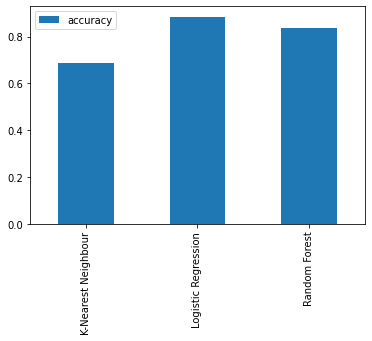

In [155]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar();

In [153]:
model_compare

,K-Nearest Neighbour,Logistic Regression,Random Forest
accuracy,0.688525,0.885246,0.836066


<br>

**Conclusion :** Logistic Regression seems to perform the best (without hyperparameter tuning) on heart disease dataset.<br>Assume this as baseline estimator/model, as accuracy can be improved via hyperparameter tuning.

<br><br>

### Hyperparameter tuning and Cross-Validation
<br>

3 ways :
* manually by hand
* RandomizedSearchCV
* GridSearchCV
<br>

#### I. Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) manually by hand

The one main hyperparameter to tune for the K-Nearest Neighbors (KNN) algorithm - neighbours. The default is 5 (i.e. `n_neigbors=5`).

> What are neighbours in KNN ?<br><br>
Imagine all our different samples on one graph (like the scatter graph shown above). KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the `5` closest dots around it to be in the same class.

Let's try to tune `n_neighbors` value (from 1 to 20) and plot them on a graph to understand visually :

In [183]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-

In [160]:
print('The train scores of 20 KNN models :')

train_scores

The train scores of 20 KNN models :


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [161]:
print('The test scores of 20 KNN models :')

test_scores

The test scores of 20 KNN models :


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


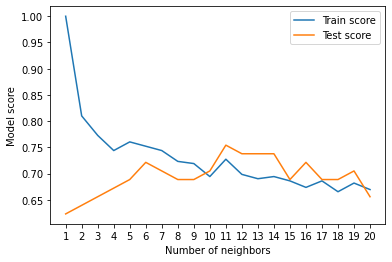

In [158]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")

plt.xticks(np.arange(1, 21, 1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

<br>

Looking at the graph, KNN Classifier achieves its best when `n_neighbors = 11` (score of 75.14%) as compared to its baseline score of 68.85%.

However, it is still under-performed w.r.t. `LogisticRegression` or the `RandomForestClassifier`. 

<br><br>

#### II. Tune models with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Here, let's one-by-one tune below models using `RandomizedSearchCV` :
* `LogisticRegression()`
* `RandomForestClassifier()`

<br>

For both, we'll pass it different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try `20` different combinations of hyperparameters from `log_reg_grid` and save the best ones.

<br>

In [163]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]
               }


# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

In [182]:
len(np.arange(10, 1000, 50)) * 4 * 9 * 9

6480

<br>

**A). tune LogisticRegression :**

In [177]:
# Setup random seed
np.random.seed(42)


# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [169]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [170]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

<br><br>

**B). tune RandomForestClassifier :**

In [178]:
# Setup random seed
np.random.seed(42)


# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
                          )


# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [172]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [173]:
# Evaluate the randomizedsearch randomforest model on test data
rs_rf.score(X_test, y_test)

0.8688524590163934

<br>

**Conclusion :** So from the above analysis, although RandomForest Classifier's accuracy increased with hyperparameter tuning but,<br><br>LogisticRegression is still better or out-performing than others.

<br><br>

#### III. Tuning a model with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.

* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

<br>

**A). tune LogisticRegression :**

In [184]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]
               }


# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [175]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [176]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

<br>

**Conclusion :** LogisticRegression is still the better than others, however `GridSearchCV` didn't add much into its performance.<br>Perhaps, choosing other hyperparameters in our `log_reg_grid` may increase its performance.

<br><br>

## Evaluating a Classification Model (beyond accuracy)

- a. &nbsp; ROC curve and AUC score - `plot_roc_curve()`
- b. &nbsp; Confusion matrix - `confusion_matrix()`
- c. &nbsp; Classification report - `classification_report()`
- d. &nbsp; Precision - `precision_score()`
- e. &nbsp; Recall - `recall_score()`
- f. &nbsp; F1-score - `f1_score()`

<br>

Firstly, make preidctions on test data via the **LogisticRegression (GridSearchCV) model** :

In [186]:
y_preds = gs_log_reg.predict(X_test)

y_preds     # predicted labels

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [187]:
y_test      # true labels

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

<br>

#### a. ROC curve and AUC score

> ROC curve is a way of understanding how a model is performing by comparing the True-Positive-Rate to the False-Positive-Rate.

> **Explanation :** In our case...<br><br>
> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A False-Positive in this case occurs when the person tests positive, but does not actually have the disease. On the other hand, a False Negative occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

_Here, I'll use the GridSearchCV version of our LogisticRegression estimator, `gs_log_reg` as well as the test data, X_test and y_test :_

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


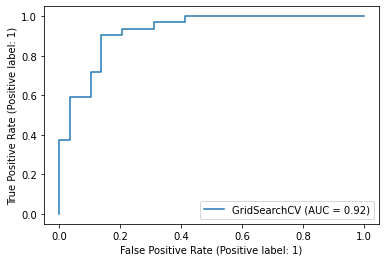

In [190]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)


<br>

**Conclusion (for ROC & AUC) :** A perfect model achieves an AUC score of `1.0`, so this score of `0.92` is close to. However, there's still room for improvement.

<br><br>

#### b. Confusion matrix

> Confusion matrix is a visual way to show where a model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [191]:
# Display confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


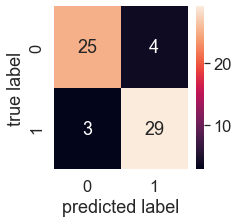

In [211]:
# Import Seaborn
import seaborn as sns

sns.set(font_scale=1.5) # Increase font size


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,                         # Annotate the boxes
                     cbar=True)
    
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    

plot_conf_mat(y_test, y_preds)

<br><br>

#### c. Classification report

Make a classification report using `classification_report()` and passing it the true labels as well as model's predicted labels.

A classification report also gives an information of the **precision** and **recall** of the model for each class.


> ***Precision -*** Indicates the proportion of positive identifications (i.e. model predicted about class=1) which were actually correct. A model which produces no False Positives has a precision of 1.0 (FP=0 implies Precision=1.0) .<br><br>
***Recall -*** Indicates the proportion of actual positives which were correctly classified. A model which produces no False Negatives has a recall of 1.0 (FN=0 implies Recall=1.0).<br><br>
***F1 score -*** A combination of precision and recall. A perfect model achieves an F1-Score of 1.0 .<br><br>
***Support -*** The number of samples each metric was calculated on.<br><br>
***Accuracy -*** The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0 .<br><br>
***Macro Avg -*** Short for macro average. It's the average Precision, Recall and F1-Score between classes.<br>Macro Avg doesn’t take class imbalance into effort, so if class imbalances is present, pay attention to this metric.<br><br>
***Weighted Avg -*** Short for weighted average. The weighted average Precision, Recall and F1-Score between classes.<br>Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [196]:
# Show classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<br>
This Classification Report is calculated on that test sample which is formed from just 1 split of dataset only.

<br><br>

### Calculate Evaluation Metric using Cross-Validation 

Now, calculating a Classification Report on the cross validated splited dataset :

In [197]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

<br>



Instantiate a new model with best hyperparameters (found with GridSearchCV) :

In [209]:
# Instantiate a new model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")


<br>

* Accuracy :

In [210]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,                # 5-fold cross-validation
                         scoring="accuracy")  # accuracy as scoring


# Taking the mean, since there're 5 values :

cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

<br>

* Precision :

In [201]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,                   # 5-fold cross-validation
                                       scoring="precision"))   # precision as scoring

cv_precision

0.8215873015873015

<br>

* Recall :

In [202]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,               # 5-fold cross-validation
                                    scoring="recall"))  # recall as scoring
cv_recall

0.9272727272727274

<br>

* F1-Score

In [203]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,            # 5-fold cross-validation
                                scoring="f1"))   # f1 as scoring
cv_f1

0.8705403543192143

<br>

Create a visual graph of these metrics :

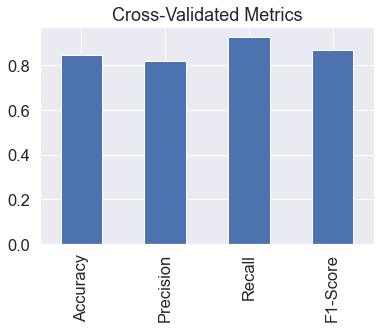

In [214]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1-Score": cv_f1},
                          index=[0])


cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

<br><br>

## Feature Importance

Feature importance is another way of asking, **"Which features contributing most to the outcomes of the model ? How do they contribute ?"**

_(While trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not ?)_

To do so, use the `coef_` attribute.<br>
For LogisticRegression, the `coef_` attribute is -> coefficient of the features in the decision function.

In [216]:
# Fit an instance of LogisticRegression (taken from above)

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [217]:
# Check coef_

clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

<br>

These values in array means, _how much each feature contributes to how a model makes a decision on whether, patterns in a sample of patients health data leans more towards having heart disease or not._

In [218]:
# Match features to columns

features_dict = dict(zip(df.columns, list(clf.coef_[0])))

features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

<AxesSubplot:title={'center':'Feature Importance'}>

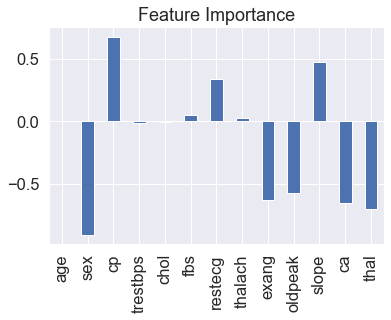

In [220]:
# Visualize feature importance

features_df = pd.DataFrame(features_dict, index=[0])

features_df.T.plot.bar(title="Feature Importance", legend=False)

Notice, some are negative and some are positive.

> The larger the value (bigger bar), the more the feature contributes to the models decision.

<br>

> If the value is negative, it means there's a Negative Correlation. And, vice versa for positive values.

<br>

For example :<br>The `"sex"` attribute has a negative value of `-0.904`, which means as the value for `"sex"` increases, the `"target"` value decreases.

In [221]:
# comparing "sex" column to the "target" column.

pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


<br>

**Explanation :**

- When `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target = 1`) than without heart disease.


- However, as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.


- **It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems _if the patient is female, they're more likely to have heart disease._**

<br><br>

For example :<br>Compare `"slope"` with `"target"` column.

In [222]:
# compare "slope" with "target" column.  # Positive Correlation

pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


<br>

**Explanation :**

- According to the model, there's a positive correlation of `0.470`, not as strong as `sex` and `target` but still more than 0.


- This Positive Correlation means, the model is picking up the pattern that - as `slope` increases, so does the `target` value.